### Load Data

In [ ]:
import numpy as np
import pandas as pd
import itertools
#import sqlalchemy
#import pymysql

pd.options.display.max_rows = 20
pd.options.display.max_columns = 15
pd.set_option('precision', 2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 100

In [ ]:
# read data
df=pd.read_csv('uber_nyc_enriched.csv')
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


### Dataset Basic Visualization

In [ ]:
boro_df=df[['pickups','borough']]
boro_df

,pickups,borough
0,152,Bronx
1,1519,Brooklyn
2,0,EWR
3,5258,Manhattan
4,405,Queens
...,...,...
29096,0,EWR
29097,3828,Manhattan
29098,580,Queens
29099,0,Staten Island


In [ ]:
plot_df_boro=boro_df.groupby('borough').sum()
plot_df_boro

,pickups
borough,
Bronx,220047
Brooklyn,2321035
EWR,105
Manhattan,10367841
Queens,1343528
Staten Island,6957


Text(0.5, 0, 'borough')

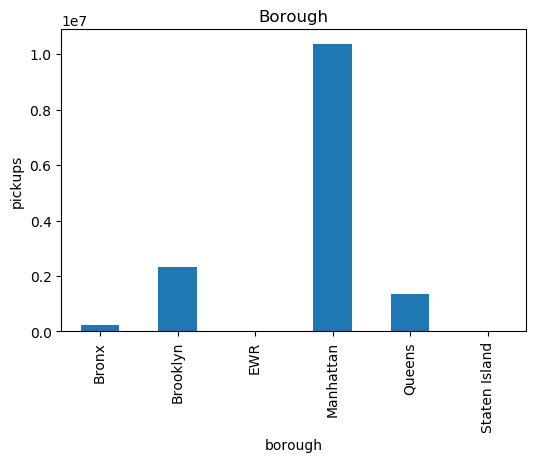

In [ ]:
ax=plot_df_boro.plot.bar(legend=False,title='Borough')
ax.set_ylabel("pickups")
ax.set_xlabel("borough")


##### wind speed

In [ ]:
ws_df=df[['pickups','spd']]

In [ ]:

labels = [ "{0} - {1}".format(i, i + 3) for i in range(0, 24, 3) ]
ws_df['wind speed'] = pd.cut(ws_df['spd'], range(0, 25, 3), right=False, labels=labels)
ws_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pickups,spd,wind speed
0,152,5.0,3 - 6
1,1519,5.0,3 - 6
2,0,5.0,3 - 6
3,5258,5.0,3 - 6
4,405,5.0,3 - 6
...,...,...,...
29096,0,7.0,6 - 9
29097,3828,7.0,6 - 9
29098,580,7.0,6 - 9
29099,0,7.0,6 - 9


In [ ]:
ws_df[ws_df['spd']<3]['pickups'].sum()


2036521

In [ ]:
ws_df=ws_df[['pickups','wind speed']]
ws_df

,pickups,wind speed
0,152,3 - 6
1,1519,3 - 6
2,0,3 - 6
3,5258,3 - 6
4,405,3 - 6
...,...,...
29096,0,6 - 9
29097,3828,6 - 9
29098,580,6 - 9
29099,0,6 - 9


In [ ]:
plot_df_ws=ws_df.groupby('wind speed').sum()
plot_df_ws

,pickups
wind speed,
0 - 3,2036521
3 - 6,4126093
6 - 9,5156104
9 - 12,2080657
12 - 15,523094
15 - 18,304478
18 - 21,37636
21 - 24,1190


Text(0.5, 0, 'wind_speed (miles/h)')

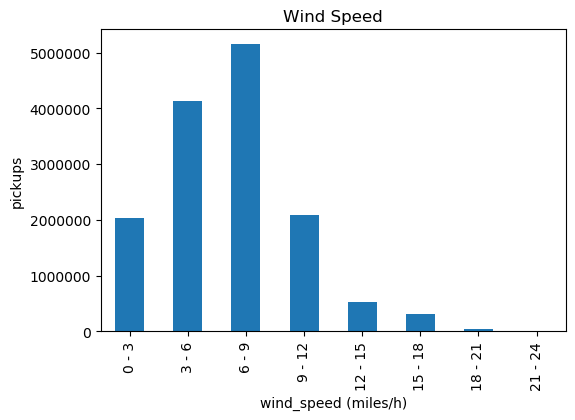

In [ ]:
ax=plot_df_ws.plot.bar(legend=False,title='Wind Speed')
ax.set_ylabel("pickups")
ax.set_xlabel("wind_speed (miles/h)")


##### Snow Depth

In [ ]:
sd_df=df[['pickups','sd']]
max(sd_df.sd)

19.0

In [ ]:
sd_df=df[['pickups','sd']]
labels = [ "{0} - {1}".format(i, i + 1) for i in range(0, 10) ]
labels

['0 - 1',
 '1 - 2',
 '2 - 3',
 '3 - 4',
 '4 - 5',
 '5 - 6',
 '6 - 7',
 '7 - 8',
 '8 - 9',
 '9 - 10']

In [ ]:
sd_df['snow depth'] = pd.cut(sd_df['sd'], range(0, 11,1), right=False, labels=labels)
sd_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pickups,sd,snow depth
0,152,0.0,0 - 1
1,1519,0.0,0 - 1
2,0,0.0,0 - 1
3,5258,0.0,0 - 1
4,405,0.0,0 - 1
...,...,...,...
29096,0,0.0,0 - 1
29097,3828,0.0,0 - 1
29098,580,0.0,0 - 1
29099,0,0.0,0 - 1


In [ ]:
plot_df_sd=sd_df[['pickups','snow depth']].groupby('snow depth').sum()
plot_df_sd

,pickups
snow depth,
0 - 1,10430575
1 - 2,173807
2 - 3,172469
3 - 4,39433
4 - 5,47481
5 - 6,43361
6 - 7,279708
7 - 8,225016
8 - 9,1123713


Text(0.5, 0, 'snow_depth (inches)')

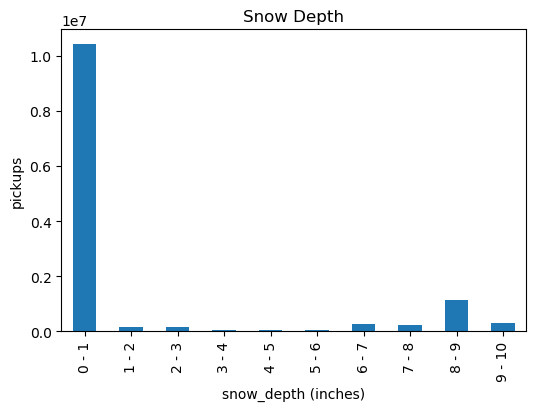

In [ ]:
ax=plot_df_sd.plot.bar(legend=False,title='Snow Depth')
ax.set_ylabel("pickups")
ax.set_xlabel("snow_depth (inches)")

##### Temperature

In [ ]:
t_df=df[['pickups','temp']]
t_df

,pickups,temp
0,152,30.0
1,1519,30.0
2,0,30.0
3,5258,30.0
4,405,30.0
...,...,...
29096,0,75.0
29097,3828,75.0
29098,580,75.0
29099,0,75.0


In [ ]:
labels = [ "{0} - {1}".format(i, i + 5) for i in range(15,80,5) ]
labels

['15 - 20',
 '20 - 25',
 '25 - 30',
 '30 - 35',
 '35 - 40',
 '40 - 45',
 '45 - 50',
 '50 - 55',
 '55 - 60',
 '60 - 65',
 '65 - 70',
 '70 - 75',
 '75 - 80']

In [ ]:
t_df['temperature'] = pd.cut(t_df['temp'], range(15, 81,5), right=False, labels=labels)
t_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pickups,temp,temperature
0,152,30.0,30 - 35
1,1519,30.0,30 - 35
2,0,30.0,30 - 35
3,5258,30.0,30 - 35
4,405,30.0,30 - 35
...,...,...,...
29096,0,75.0,75 - 80
29097,3828,75.0,75 - 80
29098,580,75.0,75 - 80
29099,0,75.0,75 - 80


In [ ]:
plot_df_tem=t_df[['pickups','temperature']].groupby('temperature').sum()
plot_df_tem

,pickups
temperature,
15 - 20,527422
20 - 25,921457
25 - 30,1095172
30 - 35,1094038
35 - 40,1374711
40 - 45,965201
45 - 50,663007
50 - 55,914928
55 - 60,1038115


Text(0.5, 0, 'temperature (F)')

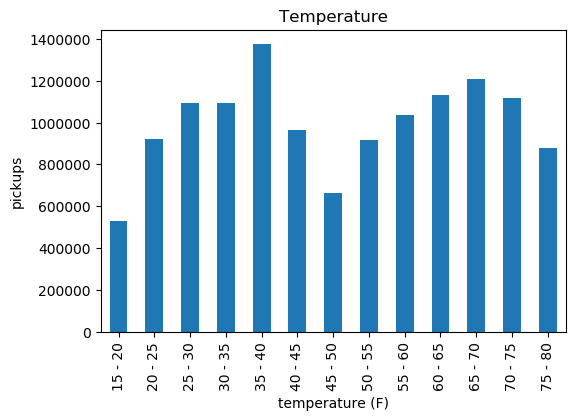

In [ ]:
ax=plot_df_tem.plot.bar(legend=False,title='Temperature')
ax.set_ylabel("pickups")
ax.set_xlabel("temperature (F)")

[Text(0, 0, '15 - 20'),
 Text(0, 0, '20 - 25'),
 Text(0, 0, '25 - 30'),
 Text(0, 0, '30 - 35'),
 Text(0, 0, '35 - 40'),
 Text(0, 0, '40 - 45'),
 Text(0, 0, '45 - 50'),
 Text(0, 0, '50 - 55'),
 Text(0, 0, '55 - 60'),
 Text(0, 0, '60 - 65'),
 Text(0, 0, '65 - 70'),
 Text(0, 0, '70 - 75'),
 Text(0, 0, '75 - 80')]

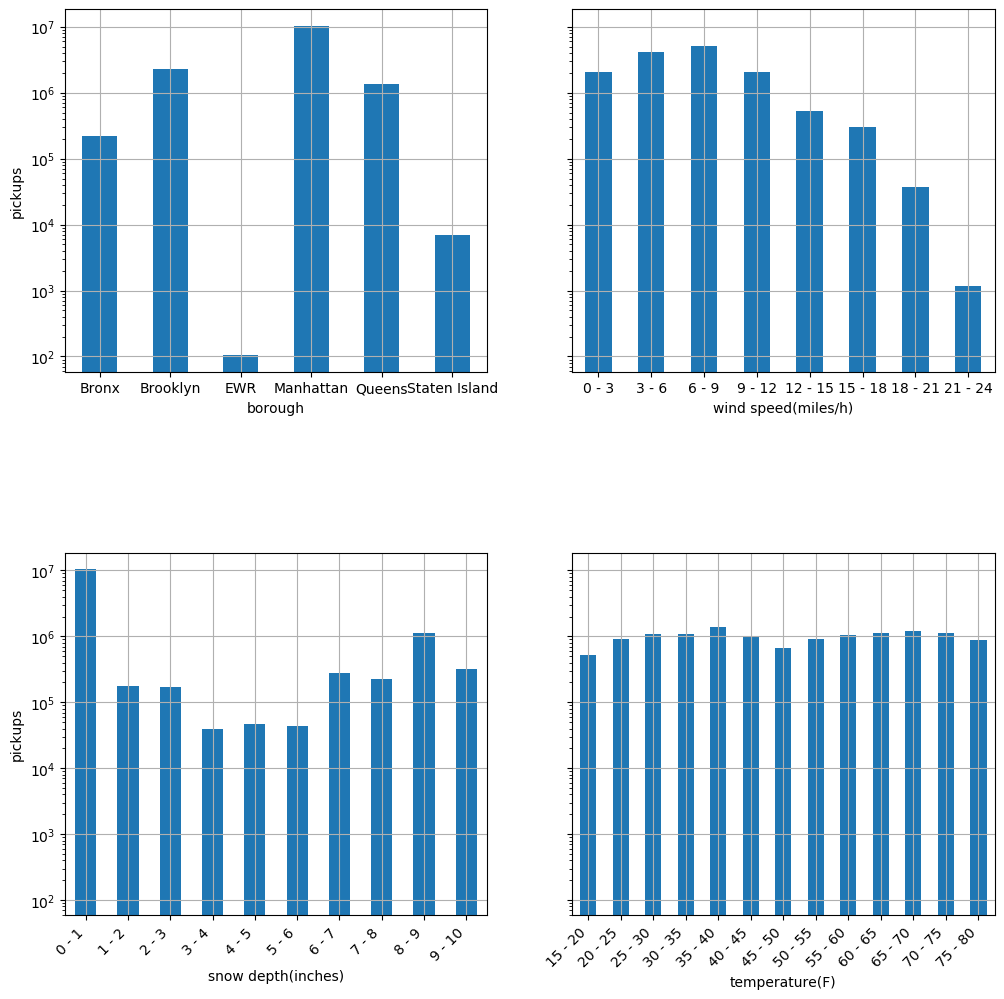

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=.5)

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax1.set_yscale('log')
ax1.set_ylabel('pickups')

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222,sharey=ax1)

ax3 = fig.add_subplot(223,sharey=ax1)
ax3.set_ylabel('pickups')

ax4 = fig.add_subplot(224,sharey=ax1)


plot_df_boro.plot.bar(ax=ax1, legend=False)
ax1.set_xlabel('borough')
ax1.grid()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=360)

plot_df_ws.plot.bar(ax=ax2, legend=False)
ax2.set_xlabel('wind speed(miles/h)')
ax2.grid()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=360)

plot_df_sd.plot.bar(ax=ax3, legend=False)
ax3.set_xlabel('snow depth(inches)')
ax3.grid()
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

plot_df_tem.plot.bar(ax=ax4, legend=False)
ax4.set_xlabel('temperature(F)')
ax4.grid()
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

In [ ]:
df_time=df[['pickup_dt','pickups']]
df_time

,pickup_dt,pickups
0,2015-01-01 01:00:00,152
1,2015-01-01 01:00:00,1519
2,2015-01-01 01:00:00,0
3,2015-01-01 01:00:00,5258
4,2015-01-01 01:00:00,405
...,...,...
29096,2015-06-30 23:00:00,0
29097,2015-06-30 23:00:00,3828
29098,2015-06-30 23:00:00,580
29099,2015-06-30 23:00:00,0


In [ ]:
df_time['pickup_dt']=pd.to_datetime(df_time['pickup_dt'])
df_time['pickup_dt']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2015-01-01 01:00:00
1       2015-01-01 01:00:00
2       2015-01-01 01:00:00
3       2015-01-01 01:00:00
4       2015-01-01 01:00:00
                ...        
29096   2015-06-30 23:00:00
29097   2015-06-30 23:00:00
29098   2015-06-30 23:00:00
29099   2015-06-30 23:00:00
29100   2015-06-30 23:00:00
Name: pickup_dt, Length: 29101, dtype: datetime64[ns]

In [ ]:
df_time['month']=df_time['pickup_dt'].dt.month
df_time['hour']=df_time['pickup_dt'].dt.hour
df_time

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pickup_dt,pickups,month,hour
0,2015-01-01 01:00:00,152,1,1
1,2015-01-01 01:00:00,1519,1,1
2,2015-01-01 01:00:00,0,1,1
3,2015-01-01 01:00:00,5258,1,1
4,2015-01-01 01:00:00,405,1,1
...,...,...,...,...
29096,2015-06-30 23:00:00,0,6,23
29097,2015-06-30 23:00:00,3828,6,23
29098,2015-06-30 23:00:00,580,6,23
29099,2015-06-30 23:00:00,0,6,23


In [ ]:
time_plot=df_time.drop('pickup_dt',1)
time_plot

,pickups,month,hour
0,152,1,1
1,1519,1,1
2,0,1,1
3,5258,1,1
4,405,1,1
...,...,...,...
29096,0,6,23
29097,3828,6,23
29098,580,6,23
29099,0,6,23


In [ ]:
heatmap1_data = pd.pivot_table(time_plot, values='pickups', 
                     index=['hour'], 
                     columns='month')


In [ ]:
heatmap1_data 

month,1,2,3,4,5,6
hour,,,,,,
0,410.45,582.12,542.62,568.75,678.59,730.94
1,315.97,393.99,379.46,403.65,480.34,507.38
2,219.63,258.82,247.45,258.55,319.63,332.02
3,163.81,178.31,161.92,170.71,210.54,222.01
4,125.66,135.72,137.90,139.02,165.47,190.39
...,...,...,...,...,...,...
19,718.94,892.81,766.77,777.72,862.91,915.23
20,676.20,873.83,781.72,772.09,820.32,838.23
21,606.02,801.95,731.80,761.50,829.00,840.29


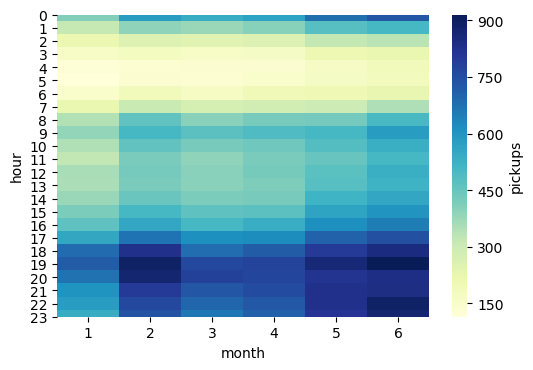

In [ ]:
import seaborn as sns
ax=sns.heatmap(heatmap1_data, cmap="YlGnBu",yticklabels=1,cbar_kws={'label': 'pickups'})


###  Date and Time

In [ ]:
# change pickup_dt data type to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])
df['pickup_dt']

0       2015-01-01 01:00:00
1       2015-01-01 01:00:00
2       2015-01-01 01:00:00
3       2015-01-01 01:00:00
4       2015-01-01 01:00:00
                ...        
29096   2015-06-30 23:00:00
29097   2015-06-30 23:00:00
29098   2015-06-30 23:00:00
29099   2015-06-30 23:00:00
29100   2015-06-30 23:00:00
Name: pickup_dt, Length: 29101, dtype: datetime64[ns]

In [ ]:
df['month'] = df['pickup_dt'].dt.month
df['month']

0        1
1        1
2        1
3        1
4        1
        ..
29096    6
29097    6
29098    6
29099    6
29100    6
Name: month, Length: 29101, dtype: int64

In [ ]:
#print each month's total pickups

result=[]
for m in range(1,7):
    result = sum(df['pickups'].loc[df['month'] == m])
    print(result)
    m+=1

1947808
2263427
2261710
2279842
2696638
2816348


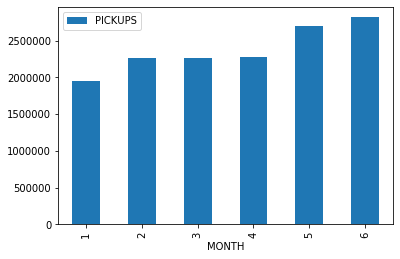

In [ ]:
df1 = pd.DataFrame({
    'MONTH':[1,2,3,4,5,6],
    'PICKUPS':[1947808,2263427,2261710,2279842,2696638,2816348]
})

df1.plot(kind='bar',x='MONTH',y='PICKUPS')
#pickups is higher in warmer time(month 5-6)

In [ ]:
df['hour'] = df['pickup_dt'].dt.hour
df['hour']

0         1
1         1
2         1
3         1
4         1
         ..
29096    23
29097    23
29098    23
29099    23
29100    23
Name: hour, Length: 29101, dtype: int64

In [ ]:
#print each hour's total pickups
result=[]
for h in range(1,24):
    result = sum(df['pickups'].loc[df['hour'] == h])
    print(result)
    h+=1

492036
319479
213988
173649
174344
231112
360054
525662
607870
550951
509848
532378
530459
557761
618684
683913
802051
932035
1013258
977646
936747
928185
886954


In [ ]:
#append in a list
l=[]
result=[]
for h in range(1,24):
    result = sum(df['pickups'].loc[df['hour'] == h])
    l.append(result)
    h+=1
print(l)

[492036, 319479, 213988, 173649, 174344, 231112, 360054, 525662, 607870, 550951, 509848, 532378, 530459, 557761, 618684, 683913, 802051, 932035, 1013258, 977646, 936747, 928185, 886954]


[1, 23, 0, 1200000]

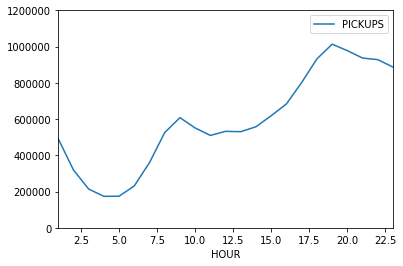

In [ ]:
df2 = pd.DataFrame({
    'HOUR':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    'PICKUPS':[492036, 319479, 213988, 173649, 174344, 231112, 360054, 525662, 607870, 550951, 509848, 532378, 
               530459, 557761, 618684, 683913, 802051, 932035, 1013258, 977646, 936747, 928185, 886954]
})

df2.plot(kind='line',x='HOUR',y='PICKUPS')
plt.axis([1,23,-0,1200000])
#pickup is lowest around 5 am, highest around 8 pm.

### Borough

### Please check the code of Yihang Zhang for linear regression

### Please skip this part

Model development & fitting

 note: class inbalance 29101 rows total; 5567 rows with 0 pickups

In [ ]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1


In [ ]:
df_no_time = df.drop(columns=['pickup_dt'])

In [ ]:
df_no_time.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1


In [ ]:
missing_data = df_no_time.loc[df_no_time['borough'].isnull()]
missing_data

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
6,NaN,4,5.00,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
13,NaN,11,3.00,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y,1,2
20,NaN,1,5.00,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y,1,3
27,NaN,2,5.00,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y,1,4
34,NaN,3,5.00,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,NaN,1,7.67,10.0,79.0,57.0,1014.1,0.0,0.0,0.0,0.0,N,6,17
29067,NaN,2,6.33,10.0,81.0,56.0,1013.4,0.0,0.0,0.0,0.0,N,6,18
29074,NaN,4,5.00,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N,6,19
29081,NaN,5,8.00,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N,6,20


In [ ]:
df_no_time.dropna(inplace=True)

In [ ]:
df_no_time

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29096,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29097,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29098,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23


In [ ]:
df_no_time['hday_binary'] = df_no_time['hday'].map({'Y': 1, 'N': 0}) 

In [ ]:
df_no_time = df_no_time.drop(columns = ['hday'])


In [ ]:
df_no_time

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,month,hour,hday_binary
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,6,23,0
29096,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,6,23,0
29097,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,6,23,0
29098,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,6,23,0


In [ ]:
feature_columns_set = set(df_no_time.columns.tolist())- set(['pickups'])- set(['hday'])
feature_columns_set 
list(feature_columns_set)

['hday_binary',
 'vsb',
 'spd',
 'hour',
 'temp',
 'borough',
 'pcp06',
 'pcp01',
 'dewp',
 'sd',
 'month',
 'pcp24',
 'slp']

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X= df_no_time[list(feature_columns_set)]
Y= df_no_time['pickups']

In [ ]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
  
X['borough']= label_encoder.fit_transform(X['borough']) 
X['borough'].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([0, 1, 2, 3, 4, 5])

In [ ]:
X

,hday_binary,vsb,spd,hour,temp,borough,pcp06,pcp01,dewp,sd,month,pcp24,slp
0,1,10.0,5.0,1,30.0,0,0.0,0.0,7.0,0.0,1,0.0,1023.5
1,1,10.0,5.0,1,30.0,1,0.0,0.0,7.0,0.0,1,0.0,1023.5
2,1,10.0,5.0,1,30.0,2,0.0,0.0,7.0,0.0,1,0.0,1023.5
3,1,10.0,5.0,1,30.0,3,0.0,0.0,7.0,0.0,1,0.0,1023.5
4,1,10.0,5.0,1,30.0,4,0.0,0.0,7.0,0.0,1,0.0,1023.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,0,10.0,7.0,23,75.0,1,0.0,0.0,65.0,0.0,6,0.0,1011.8
29096,0,10.0,7.0,23,75.0,2,0.0,0.0,65.0,0.0,6,0.0,1011.8
29097,0,10.0,7.0,23,75.0,3,0.0,0.0,65.0,0.0,6,0.0,1011.8
29098,0,10.0,7.0,23,75.0,4,0.0,0.0,65.0,0.0,6,0.0,1011.8


In [ ]:
Y = Y.astype(bool).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT = DT.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = DT.predict(X_test)

Text(0.5, 0, 'feature importance')

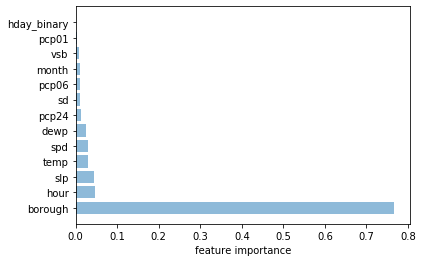

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Return the feature importances
importances = DT.feature_importances_

# y position
y_pos=X_train.columns

# Sort according by increasing feature importance values before plotting
# Set up plotframe for sorting
plotdic = {}
for i in range(len(y_pos)):
    plotdic[y_pos[i]] = importances[i] 
    
plotframe = pd.DataFrame(list(plotdic.items()), columns=['name', 'value'])
sortframe = plotframe.sort_values(by=['value'],ascending=False)

# Plot
plt.barh(sortframe['name'], sortframe['value'], align='center', alpha=0.5)
plt.xlabel('feature importance')




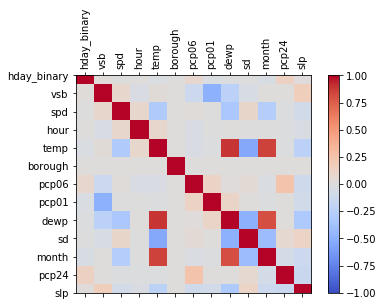

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = X

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [ ]:
from sklearn import metrics

prediction_pickups = DT.predict(X_test) #Predict the churn using test data

print("Accuracy of churndep predicted using train_df:", metrics.accuracy_score(Y_test, prediction_pickups))

Accuracy of churndep predicted using train_df: 0.9311204911742134


### Linear Regression

In [ ]:
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,2015-06-30 23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,6,23


In [ ]:
df=df.dropna()
df_reg=df.drop('pickup_dt',1)
df_reg['hday']=np.where(df_reg['hday']=='Y',1,0)
df_reg

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,month,hour
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,6,23
29096,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,6,23
29097,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,6,23
29098,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,6,23


In [ ]:
# create dummy variables for borough
boro_list=df_reg['borough'].unique()

for i in boro_list[:5]:
    df_reg[i+'_boro']=np.where(df_no_time['borough']==i,1,0)

df_reg=df_reg.drop('borough',1)
df_reg

,pickups,spd,vsb,temp,dewp,slp,pcp01,...,month,hour,Bronx_boro,Brooklyn_boro,EWR_boro,Manhattan_boro,Queens_boro
0,152,5.0,10.0,30.0,7.0,1023.5,0.0,...,1,1,1,0,0,0,0
1,1519,5.0,10.0,30.0,7.0,1023.5,0.0,...,1,1,0,1,0,0,0
2,0,5.0,10.0,30.0,7.0,1023.5,0.0,...,1,1,0,0,1,0,0
3,5258,5.0,10.0,30.0,7.0,1023.5,0.0,...,1,1,0,0,0,1,0
4,405,5.0,10.0,30.0,7.0,1023.5,0.0,...,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,990,7.0,10.0,75.0,65.0,1011.8,0.0,...,6,23,0,1,0,0,0
29096,0,7.0,10.0,75.0,65.0,1011.8,0.0,...,6,23,0,0,1,0,0
29097,3828,7.0,10.0,75.0,65.0,1011.8,0.0,...,6,23,0,0,0,1,0
29098,580,7.0,10.0,75.0,65.0,1011.8,0.0,...,6,23,0,0,0,0,1


In [ ]:
# Rescale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Initalize scaler estimator
scaler.fit(df_reg)
data_clean=pd.DataFrame(scaler.transform(df_reg),columns=df_reg.columns)
data_clean

,pickups,spd,vsb,temp,dewp,slp,pcp01,...,month,hour,Bronx_boro,Brooklyn_boro,EWR_boro,Manhattan_boro,Queens_boro
0,-0.38,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,2.24,-0.45,-0.45,-0.45,-0.45
1,0.94,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,2.24,-0.45,-0.45,-0.45
2,-0.53,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,2.24,-0.45,-0.45
3,4.54,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,-0.45,2.24,-0.45
4,-0.14,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,-0.45,-0.45,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,0.43,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,2.24,-0.45,-0.45,-0.45
26054,-0.53,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,2.24,-0.45,-0.45
26055,3.16,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,-0.45,2.24,-0.45
26056,0.03,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,-0.45,-0.45,2.24


In [ ]:
# set up target variable reg_Y for regression
reg_X=data_clean.drop('pickups',1)
reg_Y=data_clean['pickups']

# splitting train and test
reg_X_train, reg_X_test,reg_y_train, reg_y_test = train_test_split(reg_X, reg_Y, train_size=0.8)

In [ ]:
# fit Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(reg_X_train, reg_y_train)

# Predict the Test Set Results
y_pred = regressor.predict(reg_X_test)

# pair the feature names with the coefficients
list(zip(reg_X_train.columns, regressor.coef_))

[('spd', 0.006919220881045763),
 ('vsb', -0.011059258802236146),
 ('temp', 0.04533618351089951),
 ('dewp', -0.051726708442383966),
 ('slp', -0.006592581767012993),
 ('pcp01', 0.005432468574604617),
 ('pcp06', 0.011223589248231977),
 ('pcp24', -0.02210121013629174),
 ('sd', 0.016048961342210018),
 ('hday', -0.004865066509339864),
 ('month', 0.06980137400804608),
 ('hour', 0.18087749246803017),
 ('Bronx_boro', 0.016853938640061003),
 ('Brooklyn_boro', 0.1913771759326322),
 ('EWR_boro', -0.0021679653777060544),
 ('Manhattan_boro', 0.8540797610957457),
 ('Queens_boro', 0.10981405193599685)]

In [ ]:
# metrics for evaluating
print(metrics.mean_absolute_error(reg_y_test, y_pred))
print(metrics.mean_squared_error(reg_y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(reg_y_test, y_pred)))

0.3040133972954256
0.31391697629772514
0.5602829430722706


##### Build a new regressor based on top6 feature importance

In [ ]:
data_clean

,pickups,spd,vsb,temp,dewp,slp,pcp01,...,month,hour,Bronx_boro,Brooklyn_boro,EWR_boro,Manhattan_boro,Queens_boro
0,-0.38,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,2.24,-0.45,-0.45,-0.45,-0.45
1,0.94,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,2.24,-0.45,-0.45,-0.45
2,-0.53,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,2.24,-0.45,-0.45
3,4.54,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,-0.45,2.24,-0.45
4,-0.14,-0.27,0.48,-0.88,-1.11,0.73,-0.2,...,-1.47,-1.52,-0.45,-0.45,-0.45,-0.45,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,0.43,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,2.24,-0.45,-0.45,-0.45
26054,-0.53,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,2.24,-0.45,-0.45
26055,3.16,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,-0.45,2.24,-0.45
26056,0.03,0.27,0.48,1.39,1.62,-0.77,-0.2,...,1.46,1.66,-0.45,-0.45,-0.45,-0.45,2.24


In [ ]:
# set up target variable reg_Y for regression
reg_X=data_clean[['Bronx_boro','Brooklyn_boro','EWR_boro','Manhattan_boro','Queens_boro','slp','hour','dewp','temp','pcp24','pcp06']]
reg_Y=data_clean['pickups']

In [ ]:
# splitting train and test
reg_X_train, reg_X_test,reg_y_train, reg_y_test = train_test_split(reg_X, reg_Y, train_size=0.8)

# fit Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(reg_X_train, reg_y_train)

# Predict the Test Set Results
y_pred = regressor.predict(reg_X_test)

# pair the feature names with the coefficients
list(zip(reg_X_train.columns, regressor.coef_))

[('Bronx_boro', 0.01771969111341035),
 ('Brooklyn_boro', 0.19224042975330813),
 ('EWR_boro', -0.0004311207109335771),
 ('Manhattan_boro', 0.8599453757546998),
 ('Queens_boro', 0.11125642584926371),
 ('slp', -0.002190328757825168),
 ('hour', 0.18134719725170903),
 ('dewp', -0.02202920171526642),
 ('temp', 0.06401511357364312),
 ('pcp24', -0.022715018733519315),
 ('pcp06', 0.012745298835534548)]

In [ ]:
# metrics for evaluating
print(metrics.mean_absolute_error(reg_y_test, y_pred))
print(metrics.mean_squared_error(reg_y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(reg_y_test, y_pred)))

0.29200613185327917
0.2805867666117253
0.529704414378175
